In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Cross Validation

Up to now, we've seen how to: 

1. Choose a class of model
2. Select different model hyperparameters
3. Fit the model to the training data
4. Use the model to predict labels for new data


### Model validation the wrong way

Let's demonstrate the naive approach to validation using the credit dataset

In [2]:
dataset = pd.read_csv('titanic_processed.csv')
dataset

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived
0,3,22.0,1,0,7.2500,1,0,0,1,0
1,1,38.0,1,0,71.2833,0,1,0,0,1
2,3,26.0,0,0,7.9250,0,0,0,1,1
3,1,35.0,1,0,53.1000,0,0,0,1,1
4,3,35.0,0,0,8.0500,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
707,3,39.0,0,5,29.1250,0,0,1,0,0
708,2,27.0,0,0,13.0000,1,0,0,1,0
709,1,19.0,0,0,30.0000,0,0,0,1,1
710,1,26.0,0,0,30.0000,1,1,0,0,1


In [3]:
X = dataset.drop(columns='Survived')
y = dataset.Survived

In [4]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,0,1
1,1,38.0,1,0,71.2833,0,1,0,0
2,3,26.0,0,0,7.9250,0,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,1
4,3,35.0,0,0,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...,...
707,3,39.0,0,5,29.1250,0,0,1,0
708,2,27.0,0,0,13.0000,1,0,0,1
709,1,19.0,0,0,30.0000,0,0,0,1
710,1,26.0,0,0,30.0000,1,1,0,0


In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      712 non-null    int64  
 1   Age         712 non-null    float64
 2   SibSp       712 non-null    int64  
 3   Parch       712 non-null    int64  
 4   Fare        712 non-null    float64
 5   Sex_male    712 non-null    int64  
 6   Embarked_C  712 non-null    int64  
 7   Embarked_Q  712 non-null    int64  
 8   Embarked_S  712 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 50.2 KB


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [13]:
model = DecisionTreeClassifier()
model.fit(X, y)
y_pred = model.predict(X)

In [14]:
from sklearn.metrics import plot_roc_curve

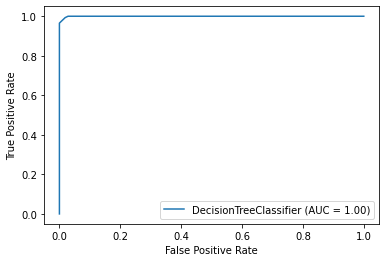

In [15]:
plot_roc_curve(model, X, y)

# The way we do it - HOLDOUT

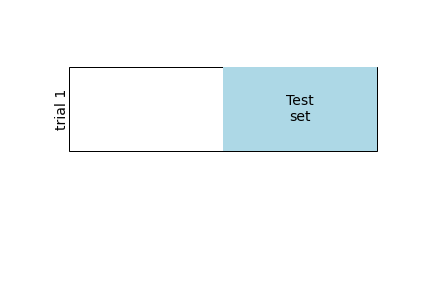

In [16]:
def draw_one_rect(N, ax, textprop={}):
    for i in range(N):
        if i == 1:
            ax.add_patch(plt.Rectangle((0, i), 5, 0.7, fc='white', ec='k'),)
            ax.add_patch(plt.Rectangle((5. * i / N, i), 5. / N, 0.7, fc='lightblue'))
            ax.text(5. * (i + 0.5) / N, i + 0.35,
                    "Test\nset", ha='center', va='center', **textprop)
            ax.text(0, i + 0.35, "trial {0}".format(N - i),
                    ha='right', va='center', rotation=90, **textprop)
            ax.set_xlim(-1, 6)
            ax.set_ylim(-0.2, N + 0.2)
            
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
draw_one_rect(2, ax, textprop=dict(size=14))

How many do we choose to be part of the test set?

Learning Curve is the answer for that.

For the example above, we lost 50% of our data to test the model.

In [17]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

In [18]:
from sklearn.metrics import roc_auc_score, plot_roc_curve

In [19]:
from sklearn.model_selection import train_test_split

# split the data with 50% in each set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.5)

# fit the model on one set of data
model.fit(X_train, y_train)

# evaluate the model on the second set of data
score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
score

0.7464285714285714

# Comparar o resultado do treino com o resultado do teste

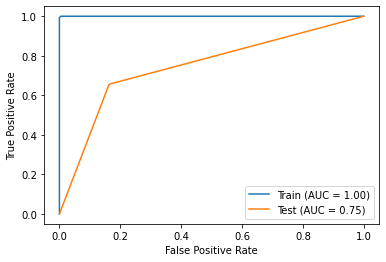

In [20]:
fig, ax = plt.subplots()
plot_roc_curve(model, X_train, y_train, ax=ax, name='Train')
plot_roc_curve(model, X_test, y_test, ax=ax, name='Test')

In [21]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(ccp_alpha=0.01)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01)

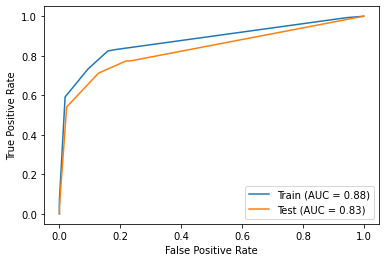

In [22]:
fig, ax = plt.subplots()
plot_roc_curve(model, X_train, y_train, ax=ax, name='Train')
plot_roc_curve(model, X_test, y_test, ax=ax, name='Test')

## However, what's going on in this process? What's wrong with it?

Tests in machine learning are thought to be destructive. If you want to tune your model, you can't have access to the test. The test is supposed to be hidden from you until the last minute. 

It is true, though, that the best estimate for a True error is the estimative from the `Test set`. But how do we do that, then?

# Cross Validation

In [23]:
def draw_rects(N, ax, textprop={}):
    for i in range(N):
        ax.add_patch(plt.Rectangle((0, i), 5, 0.7, fc='white', ec='k'),)
        ax.add_patch(plt.Rectangle((5. * i / N, i), 5. / N, 0.7, fc='lightblue'))
        ax.text(5. * (i + 0.5) / N, i + 0.35,
                "Validation\nset", ha='center', va='center', **textprop)
        ax.text(0, i + 0.35, "trial {0}".format(N - i),
                ha='right', va='center', rotation=90, **textprop)
    ax.set_xlim(-1, 6)
    ax.set_ylim(-0.2, N + 0.2)

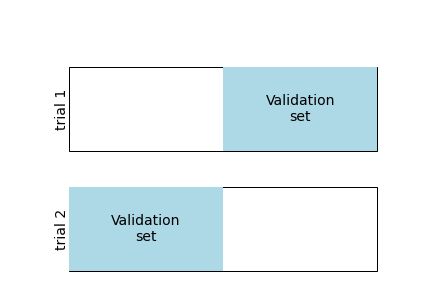

In [24]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
draw_rects(2, ax, textprop=dict(size=14))

**Inside our own** `Training Set`, we can separate into piece of `Training space` and what is called `Validation Space` or `Validation Set`.

You should, then, **tune** your model using the validation set. After tuning your model, after being satisfied with your results, you can then calculate an estimative of the error on the Test Set. This will be your best estimate of the training error. You then, guarantee that you are tuning your model **AND** not overfitting on your test data.

# KFold CV

K-Fold means you will separate your `Training Set` into K pieces. You'll run the model K times and use each of the piece once as the `validation set`.

In the end, you'll be able to obtain K scores of your model. You can then take the average of your results and check the standard deviation (you don't want your model to be too dispersive).

**K = 5** example

Text(2, 5, 'Training Set')

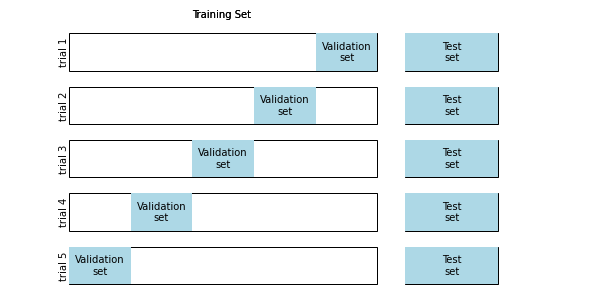

In [25]:
N = 5
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
draw_rects(N, ax, textprop=dict(size=10))
# adicionar imagem do test-set

ax2 = fig.add_axes([.85, 0, .5, 1])
ax2.axis('off')


for i in range(N):
    ax2.add_patch(plt.Rectangle((0, i), 3, 0.7, fc='white', ec='k'),)
    ax2.add_patch(plt.Rectangle((0, i), 3, 0.7, fc='lightblue'))
    ax2.text(1.5, i + 0.35, "Test\nset", ha='center', va='center')
    
ax2.set_xlim(-1, 6)
ax2.set_ylim(-0.2, N + 0.2)

ax.text(2, 5, 'Training Set')
ax.text(2, 5, 'Training Set')

## In Practice, how do we do that?

Create a cross validation object and split it to obtain `train and test indexes`.

In [30]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold

In [31]:
my_cv = KFold(5, shuffle=True)

In [32]:
from sklearn.model_selection import cross_val_score, cross_validate

In [33]:
model = DecisionTreeClassifier(max_depth=3)

## Two ways: 

### cross_val_score

In [35]:
cross_val_score(model, X_train, y_train, cv=KFold(10, shuffle=True), scoring='roc_auc', n_jobs=-1)

array([0.89930556, 0.878125  , 0.91950464, 0.85603715, 0.82692308,
       0.9264214 , 0.74342105, 0.89685315, 0.86775362, 0.69565217])

### cross_validate

In [37]:
cross_validate(model, X_train, y_train, cv=KFold(10, shuffle=True), scoring='roc_auc', return_train_score=True)

{'fit_time': array([0.00302362, 0.0030303 , 0.00300169, 0.00302601, 0.00202107,
        0.00200248, 0.00297356, 0.00199986, 0.00200725, 0.00200057]),
 'score_time': array([0.00200701, 0.00198603, 0.00199938, 0.00199914, 0.00199151,
        0.00199938, 0.00202727, 0.00199962, 0.00197339, 0.00200248]),
 'test_score': array([0.94155844, 0.67056856, 0.98461538, 0.87306502, 0.70897833,
        0.85555556, 0.84280303, 0.86564626, 0.80263158, 0.86      ]),
 'train_score': array([0.88519287, 0.9085596 , 0.8714539 , 0.87384615, 0.91573333,
        0.88562278, 0.88192045, 0.89102979, 0.88968254, 0.88536001])}

In [35]:
cross_val_score(model, X, y, cv=KFold(10, shuffle=True), scoring='precision', n_jobs=-1)

array([0.78571429, 0.77419355, 0.81481481, 0.7       , 0.76      ,
       0.91666667, 0.81818182, 0.83333333, 0.69565217, 0.83333333])

# Leave One Out - LOOCV

Leave one out is a specific case of KFold. It uses all the dataset for training and just leave one observation out for testing. Then repeat this process N times (N being the number of observations). This is the same as specifying KFold(N).

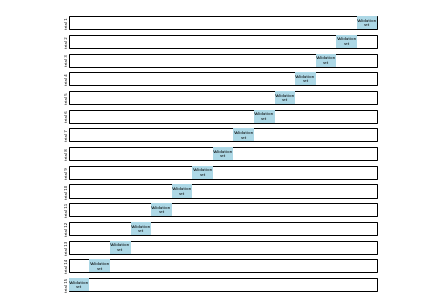

In [37]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
draw_rects(15, ax, textprop=dict(size=4))


This method is good when you have a small number of observations. But when you have a big dataset, this process starts to get too slow and costly.

In [41]:
from sklearn.model_selection import LeaveOneOut

scores = cross_val_score(model, X, y, cv=LeaveOneOut())
np.mean(scores)

0.8160112359550562

# Learning Curve

In [42]:
model = DecisionTreeClassifier()

In [43]:
from sklearn.model_selection import learning_curve

curve = learning_curve(model, X, y, cv=KFold(10))

train_sizes = curve[0]
train_scores = curve[1]
test_scores = curve[2]



In [44]:
train_scores.mean(axis=1)

array([1.        , 0.99375   , 0.98863636, 0.98508065, 0.9871875 ])

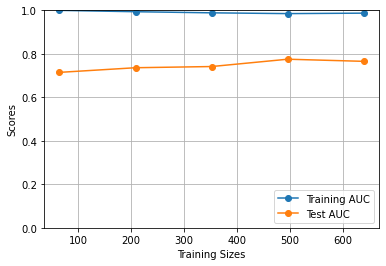

In [45]:
plt.plot(train_sizes, train_scores.mean(axis=1), '-o', label='Training AUC')
plt.plot(train_sizes, test_scores.mean(axis=1), '-o', label='Test AUC')
plt.ylim([0., 1])
plt.xlabel('Training Sizes')
plt.ylabel('Scores')
plt.legend(loc=4)
plt.grid()

In [46]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [47]:
list(zip(model.feature_importances_, X_train.columns))

[(0.1257121427241564, 'Pclass'),
 (0.26019175621945784, 'Age'),
 (0.06456006081883789, 'SibSp'),
 (0.025342561569614553, 'Parch'),
 (0.1911562734400532, 'Fare'),
 (0.3032481464312944, 'Sex_male'),
 (0.010451474691593852, 'Embarked_C'),
 (0.0, 'Embarked_Q'),
 (0.019337584104991944, 'Embarked_S')]

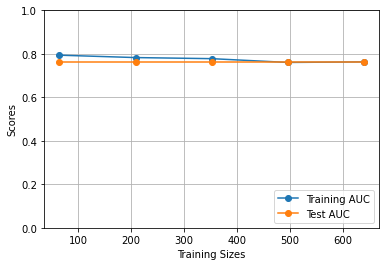

In [48]:
model = DecisionTreeClassifier(max_depth=1)

from sklearn.model_selection import learning_curve

curve = learning_curve(model, X, y, cv=KFold(10), scoring='roc_auc')

train_sizes = curve[0]
train_scores = curve[1]
test_scores = curve[2]

plt.plot(train_sizes, train_scores.mean(axis=1), '-o', label='Training AUC')
plt.plot(train_sizes, test_scores.mean(axis=1), '-o', label='Test AUC')
plt.ylim([0., 1])
plt.xlabel('Training Sizes')
plt.ylabel('Scores')
plt.legend(loc=4)
plt.grid()

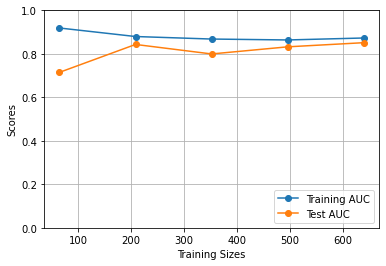

In [49]:
model = DecisionTreeClassifier(max_depth=3)

from sklearn.model_selection import learning_curve

curve = learning_curve(model, X, y, cv=KFold(10), scoring='roc_auc')

train_sizes = curve[0]
train_scores = curve[1]
test_scores = curve[2]

plt.plot(train_sizes, train_scores.mean(axis=1), '-o', label='Training AUC')
plt.plot(train_sizes, test_scores.mean(axis=1), '-o', label='Test AUC')
plt.ylim([0., 1])
plt.xlabel('Training Sizes')
plt.ylabel('Scores')
plt.legend(loc=4)
plt.grid()

https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py